# Python Opencv图像处理入门

## 1. 安装与基础使用

In [ ]:
# 安装
!pip install opencv-python

In [4]:
import cv2
import numpy as np

In [5]:
# 加载
path = 'images/21043001.jpg'
img = cv2.imread(path)
if img is None:
    raise Exception('加载图像失败')

# 保存
cv2.imwrite('test.jpg', img)

True

注意：如果图像路径中存在中文，则会加载失败，需要换一种方式：

In [18]:
# 加载
img = cv2.imdecode(np.fromfile(path, dtype=np.uint8), cv2.IMREAD_COLOR)

# 保存
cv2.imencode('.png', img)[1].tofile('test.png')

中文路径在服务器上可能比较少碰到，但是，在windows上开发的同事可能会经常碰到。

In [10]:
type(img)

numpy.ndarray

本质上，opencv的数据结构是numpy中的多维数组，所以很多numpy中的方法是可以直接用到图像上的。这个和pillow不同，后者是有自己特定的数据结构的。

In [19]:
img[:2, :2]

array([[[255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [24]:
type(img[1, 1, 1])

numpy.uint8

每个值的类型是8位的无符号整数（0-255）。

## 2. Opencv与pillow，base64的转换

在实际开发中，经常使用的图像工具还有`pillow`，以及在接口里经常要用的base64字符串，这三者是经常需要转换的：

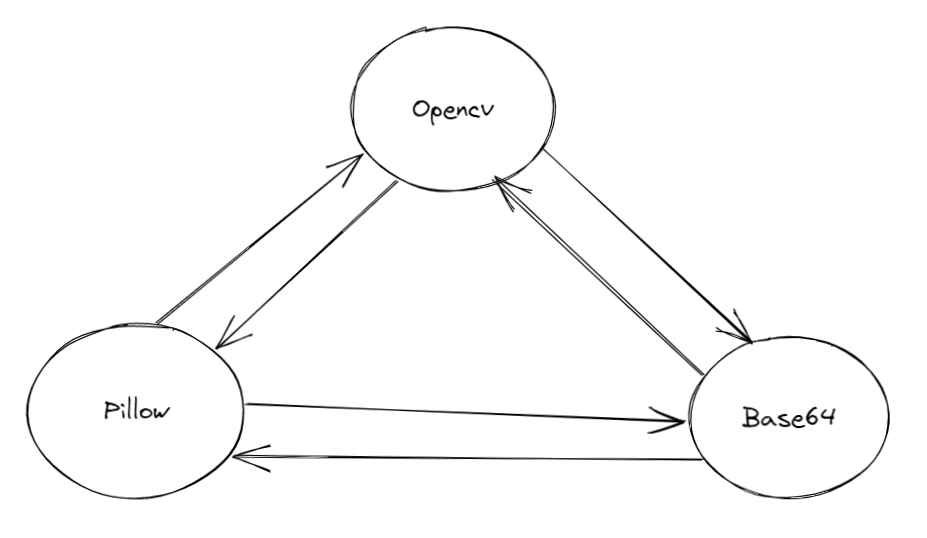

都已经封装到[https://github.com/ibbd-dev/python-image-utils/blob/master/image_utils/convert.py](https://github.com/ibbd-dev/python-image-utils/blob/master/image_utils/convert.py )

主要就是6个函数：

- cv2_pil
- cv2_base64
- pil_cv2
- pil_base64
- base64_cv2
- base64_pil

In [9]:
from image_utils.convert import cv2_pil, pil_cv2

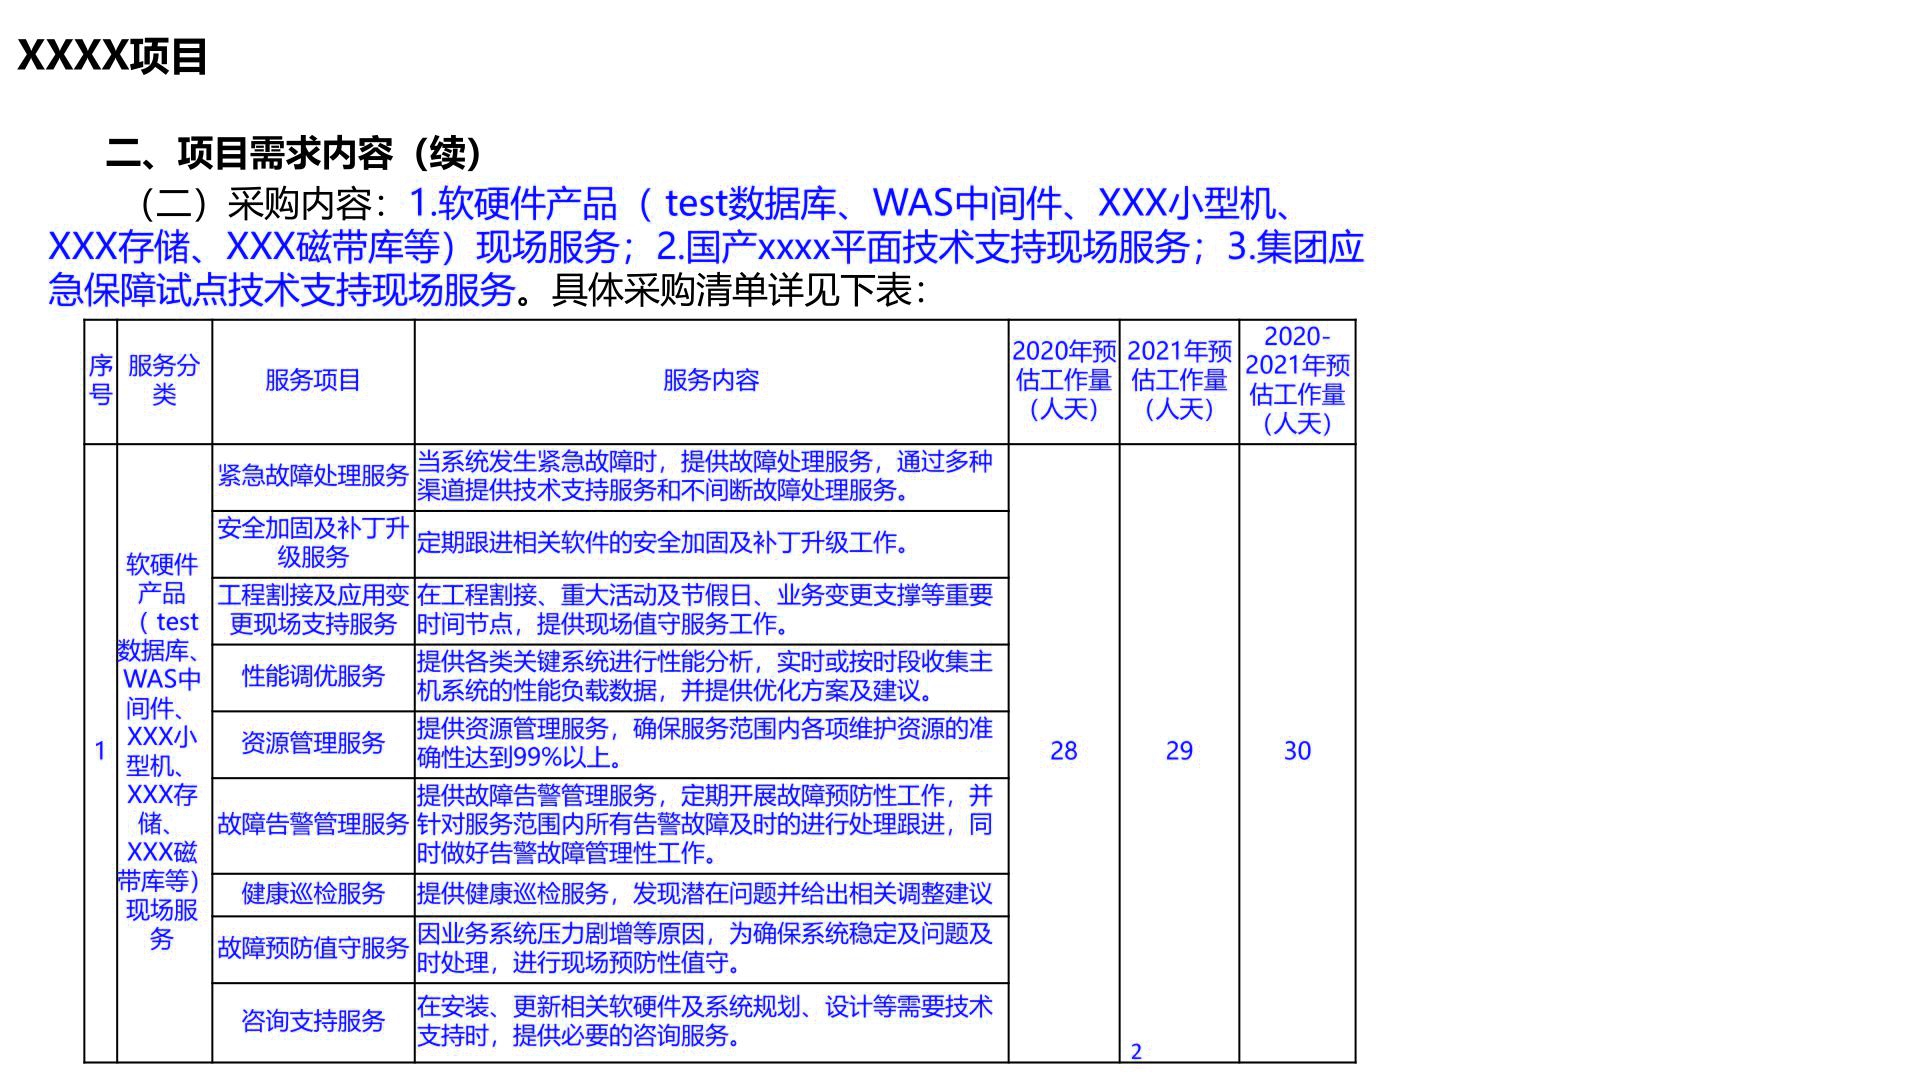

In [14]:
from IPython.display import display

path = 'images/21043001.jpg'
img = cv2.imread(path)
display(cv2_pil(img))

## 3. 维度

平时看起来图像是二维的，有宽和高，但是实际上，图像是三维的（数据结构）:

In [12]:
path = 'images/21043001.jpg'
img = cv2.imread(path)

img.shape

(1080, 1920, 3)

In [ ]:
# 高度，宽度，通道
h, w, c = img.shape

高度和宽度比较好理解，对应的就是一个像素，但是一个像素通常不是一个单一的值，例如对于普通的彩色图像，可能是三个值：R，G，B。这三个值经过计算之后，才能决定一个像素展示出来的颜色。

## 4. 颜色空间

颜色空间是图像处理中比较重要的概念，也是比较复杂的概念，具体可以看这个文章[https://zhuanlan.zhihu.com/p/112790325](https://zhuanlan.zhihu.com/p/112790325 )。在opencv中，主要使用的颜色空间有：

- BGR：这是opencv默认的颜色空间，需要特别注意。
- RGB：这里我们常见的。
- HSV
- GRAY：灰度空间
- RGBA：带透明度的颜色空间，通常是png图像

前面三种的通道数都是3，灰度空间的通道数只有1（只有黑白灰），而RGBA是4个通道（在RGB的基础上增加了一个通道，用来表示透明度）。

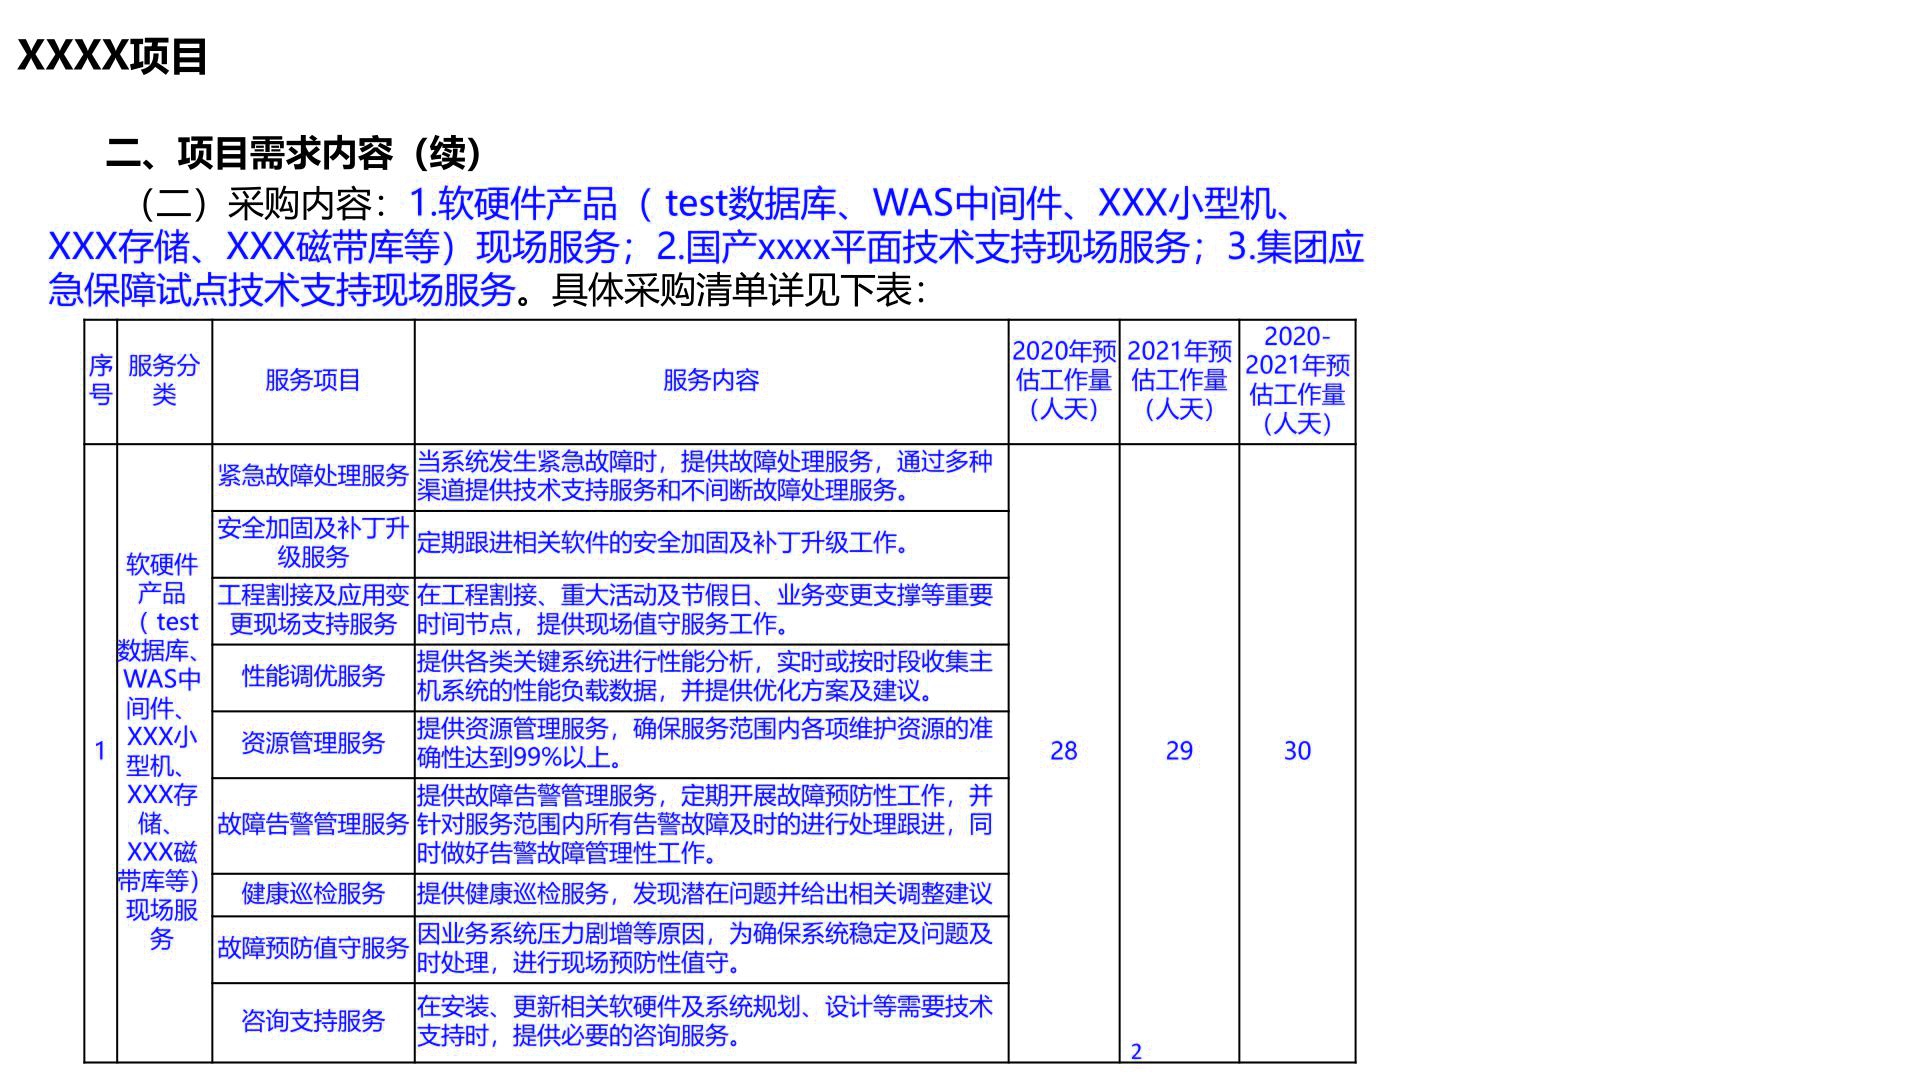

In [15]:
path = 'images/21043001.jpg'
img = cv2.imread(path)
display(cv2_pil(img))

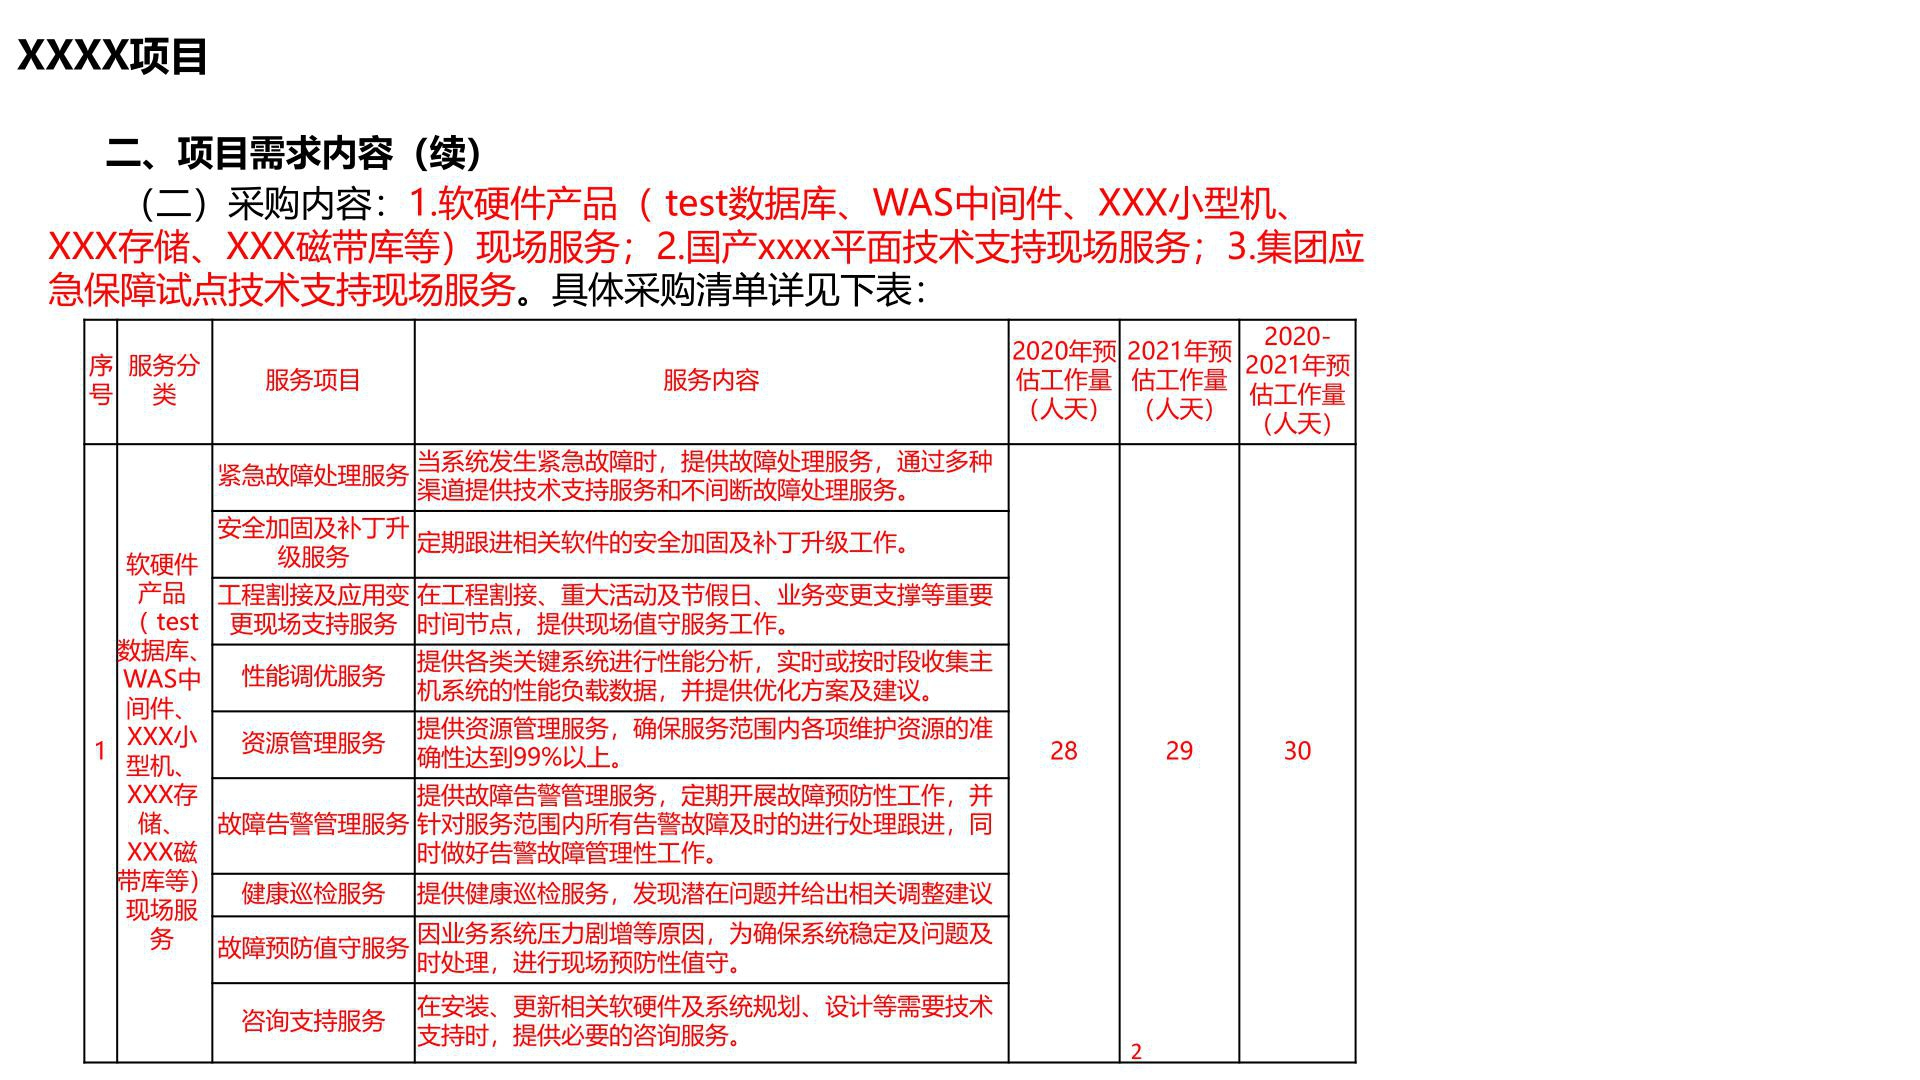

In [16]:
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(cv2_pil(img))

In [20]:
img = cv2.imread(path)
print("BGR:", img.shape)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("RGB:", img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print("GRAY:", gray.shape)

BGR: (1080, 1920, 3)
RGB: (1080, 1920, 3)
GRAY: (1080, 1920)


和我们直觉理解不一样的一点是：白色的值是255，而黑色的只是0，不要混淆了。

In [21]:
img[:2, :2]

array([[[255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [22]:
gray[:2, :2]

array([[255, 255],
       [255, 255]], dtype=uint8)

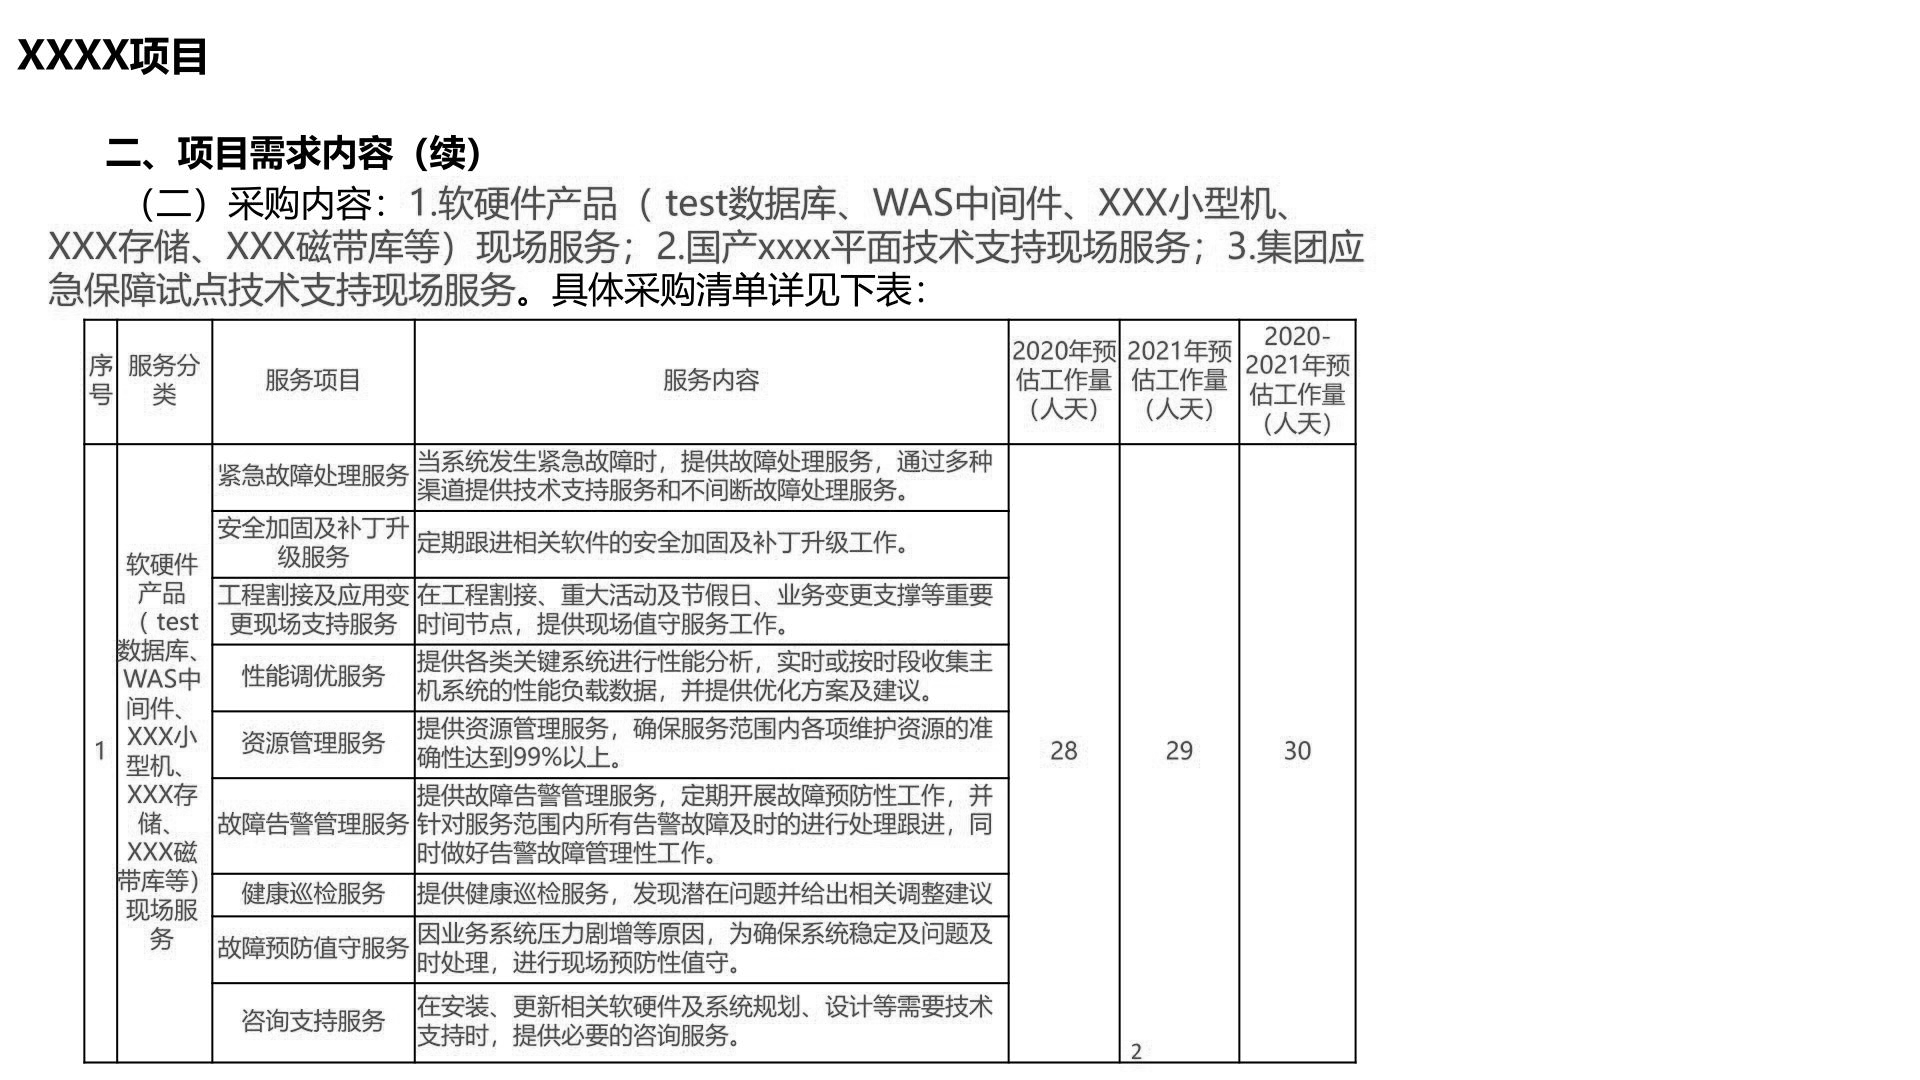

In [23]:
display(cv2_pil(gray))

## 5. 二值化

灰度图是通道数为1的图像，每个像素点的值的取值范围是0-255（np.uint8)，白色为255，黑色为0，中间的取值为灰色。不过有时只有灰度图还不够，还需要处理成只有黑白两种颜色的图像。通道数还是1，只是每个像素点的取值只能是0或者255。

在opencv中处理成二值图像的方法有好几个，具体看[https://blog.csdn.net/bugang4663/article/details/109589177](https://blog.csdn.net/bugang4663/article/details/109589177 )

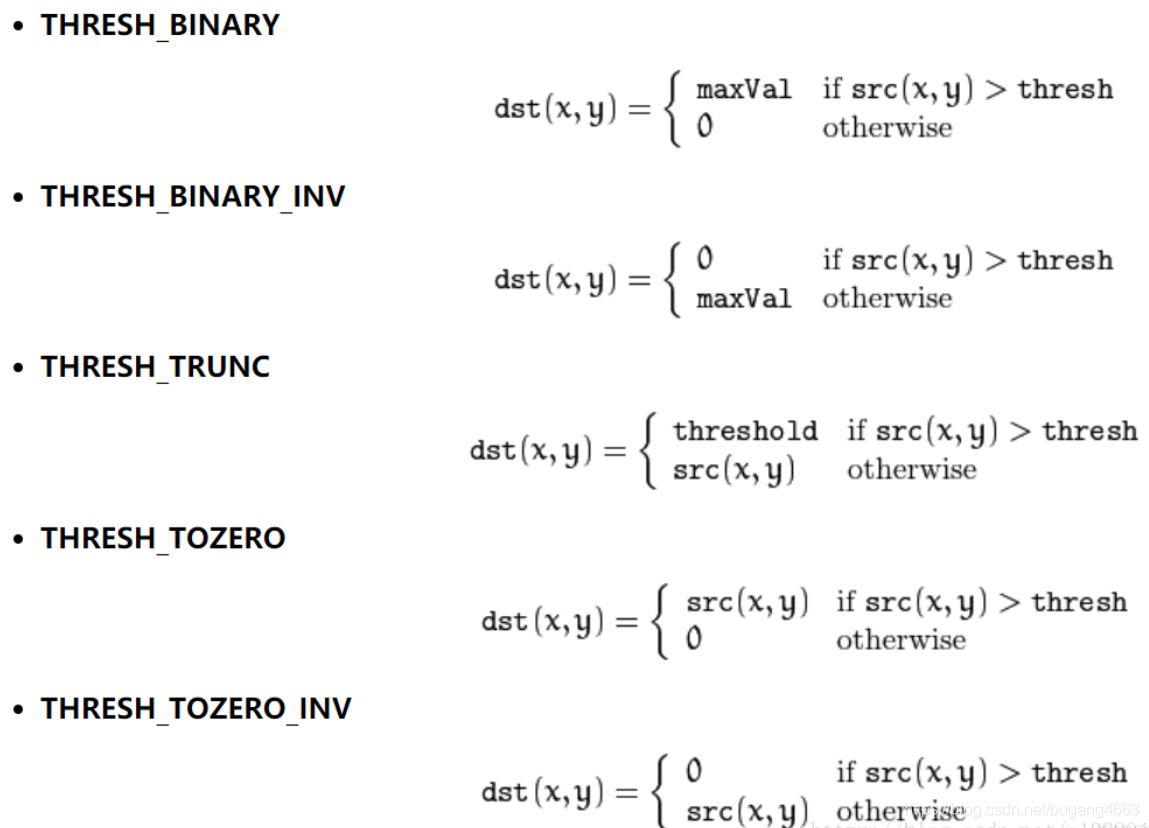

### 5.1 局部阈值法

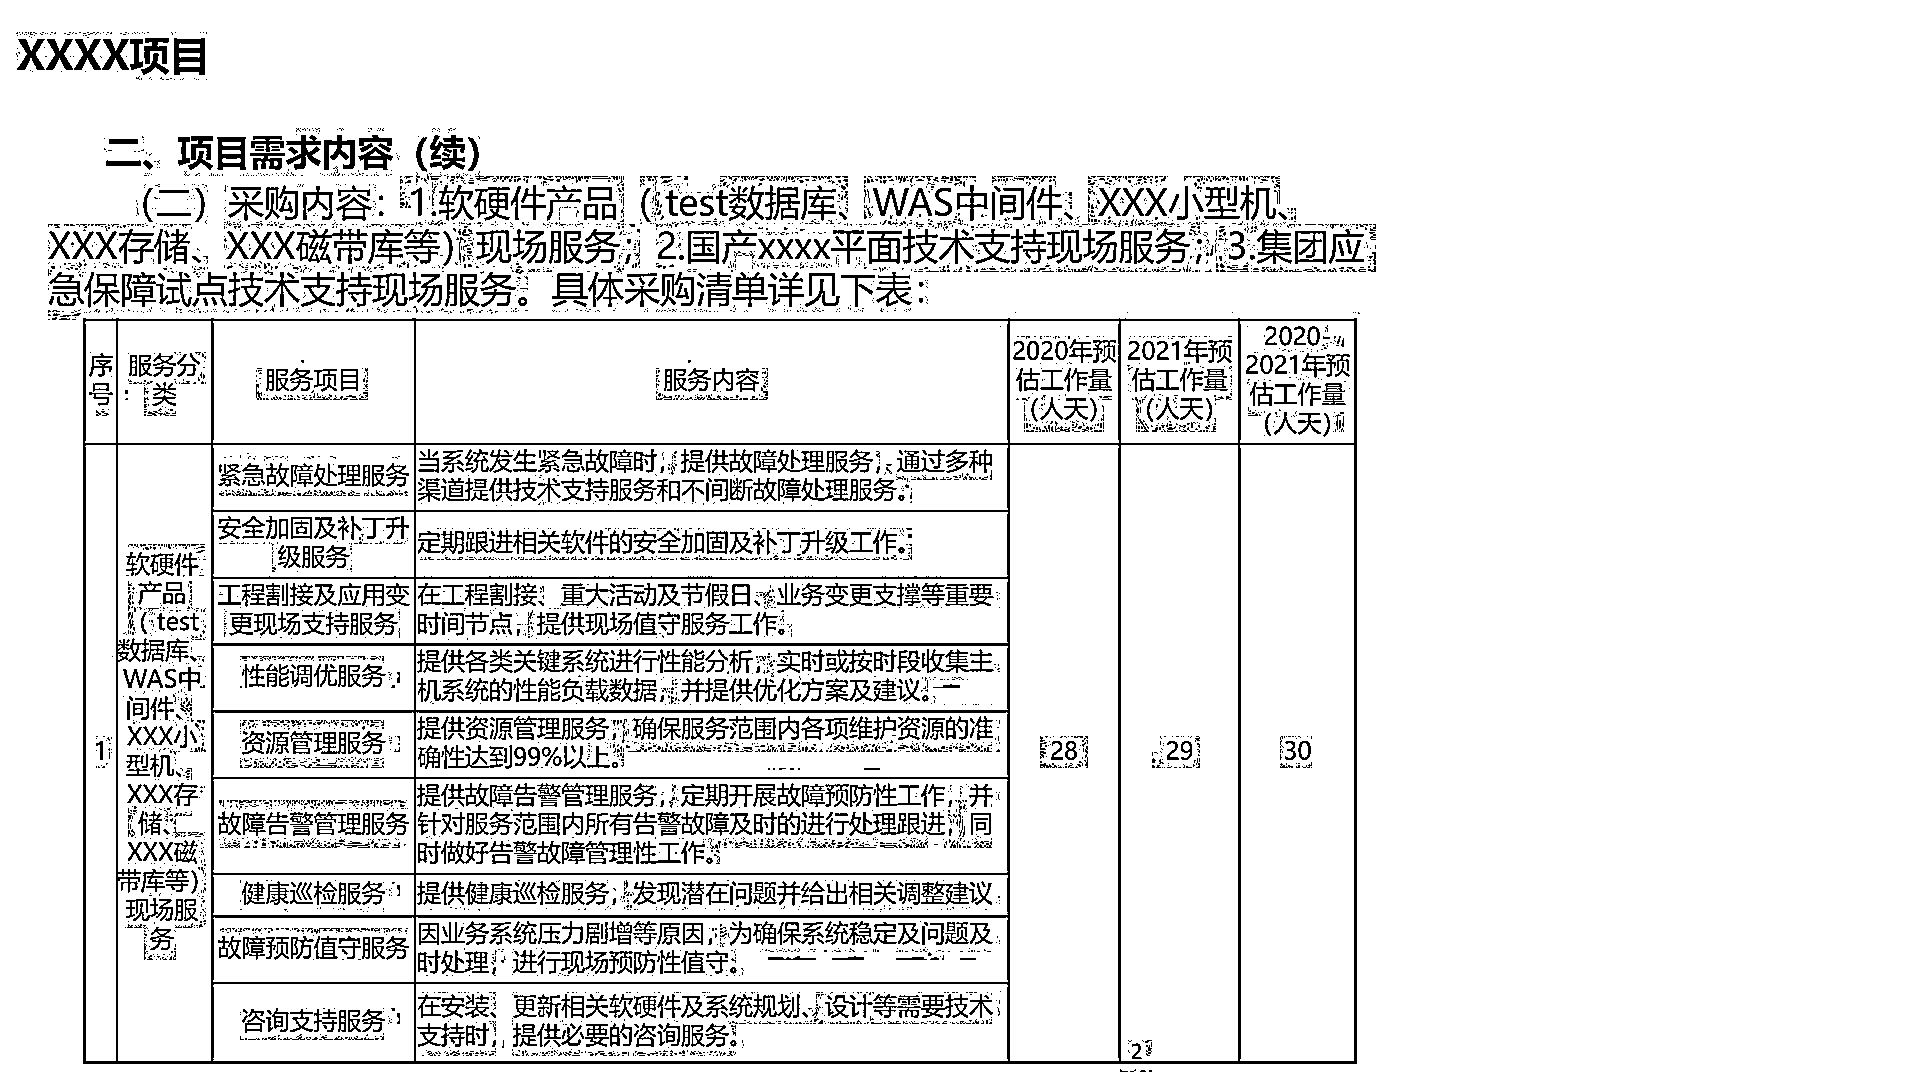

In [26]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 1)
display(cv2_pil(binary))

### 5.2 大津阈值法

根据双峰图像的图像直方图自动计算阈值。 （对于非双峰图像，二值化不准确）

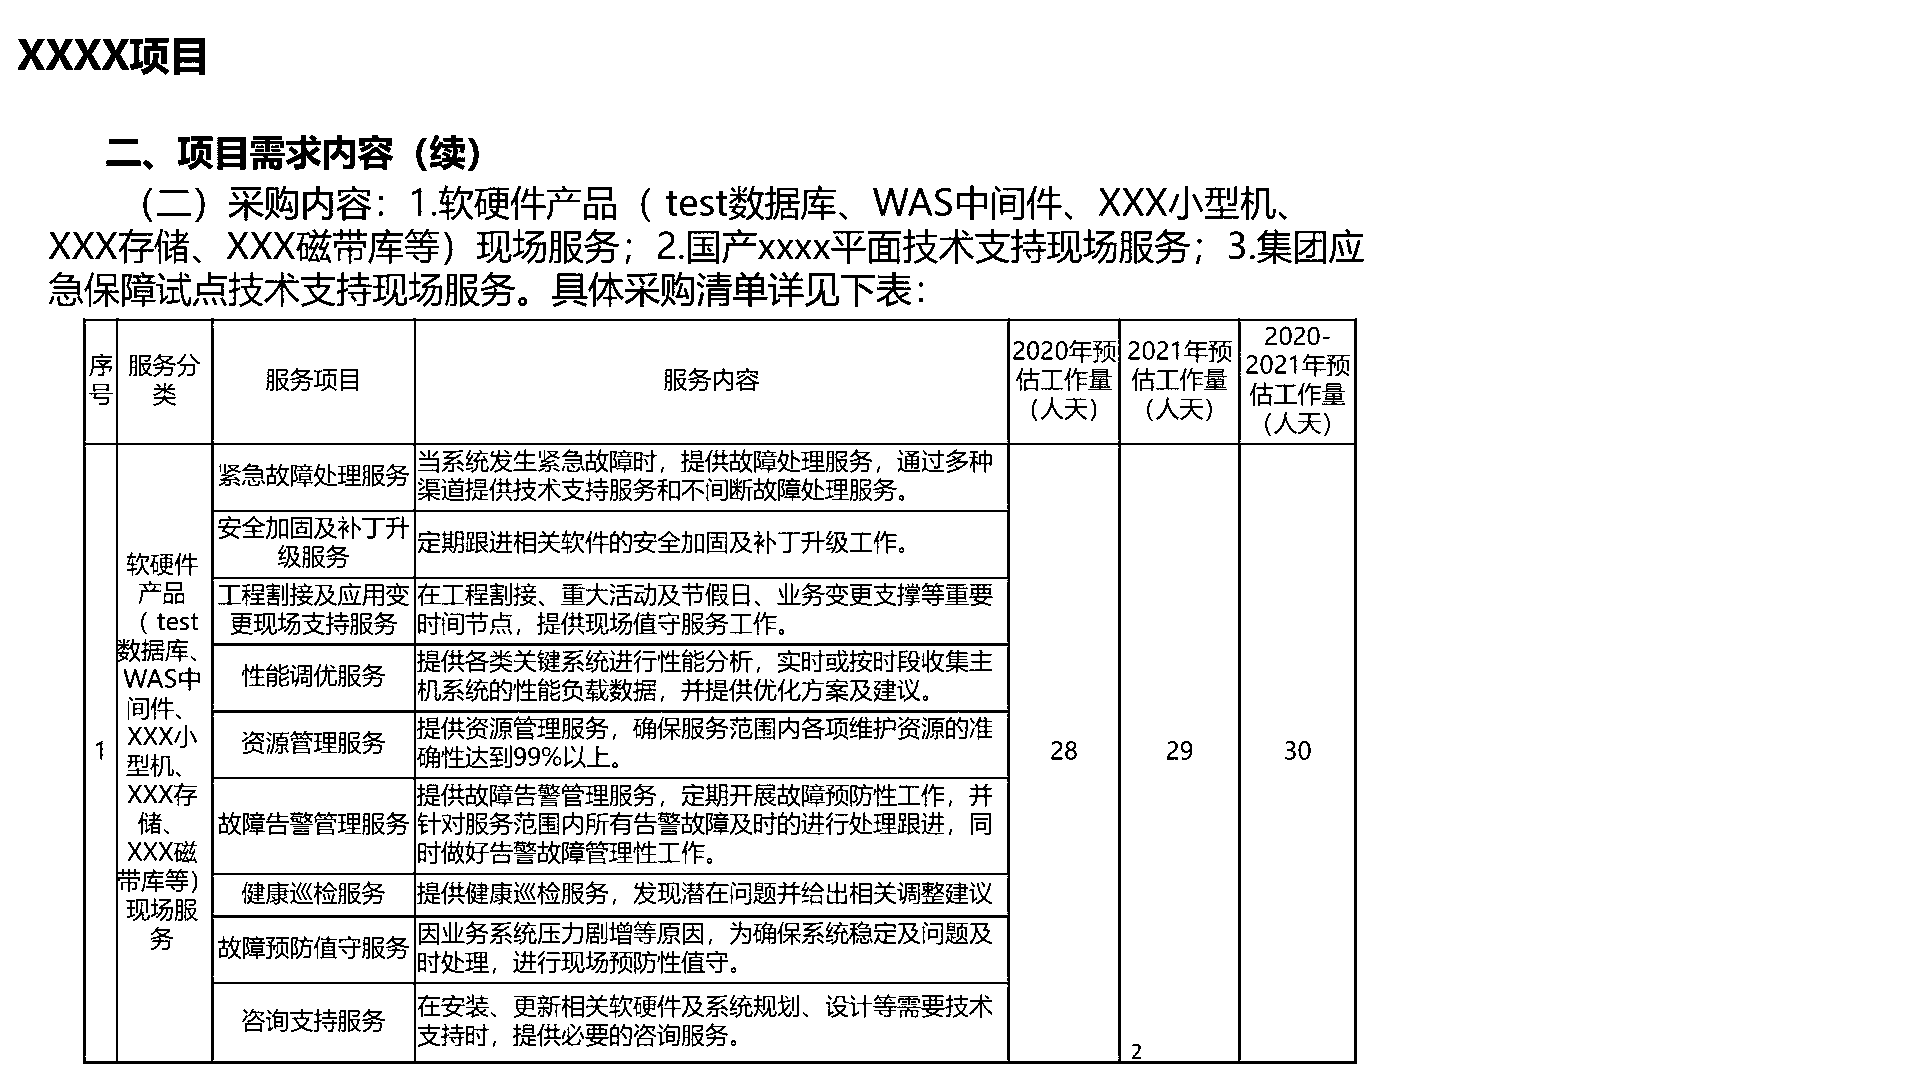

168.0

In [28]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr, binary2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
display(cv2_pil(binary2))
thr

全局阈值还有好几个，不一一列举。

## 6. 图像运算与二值运算

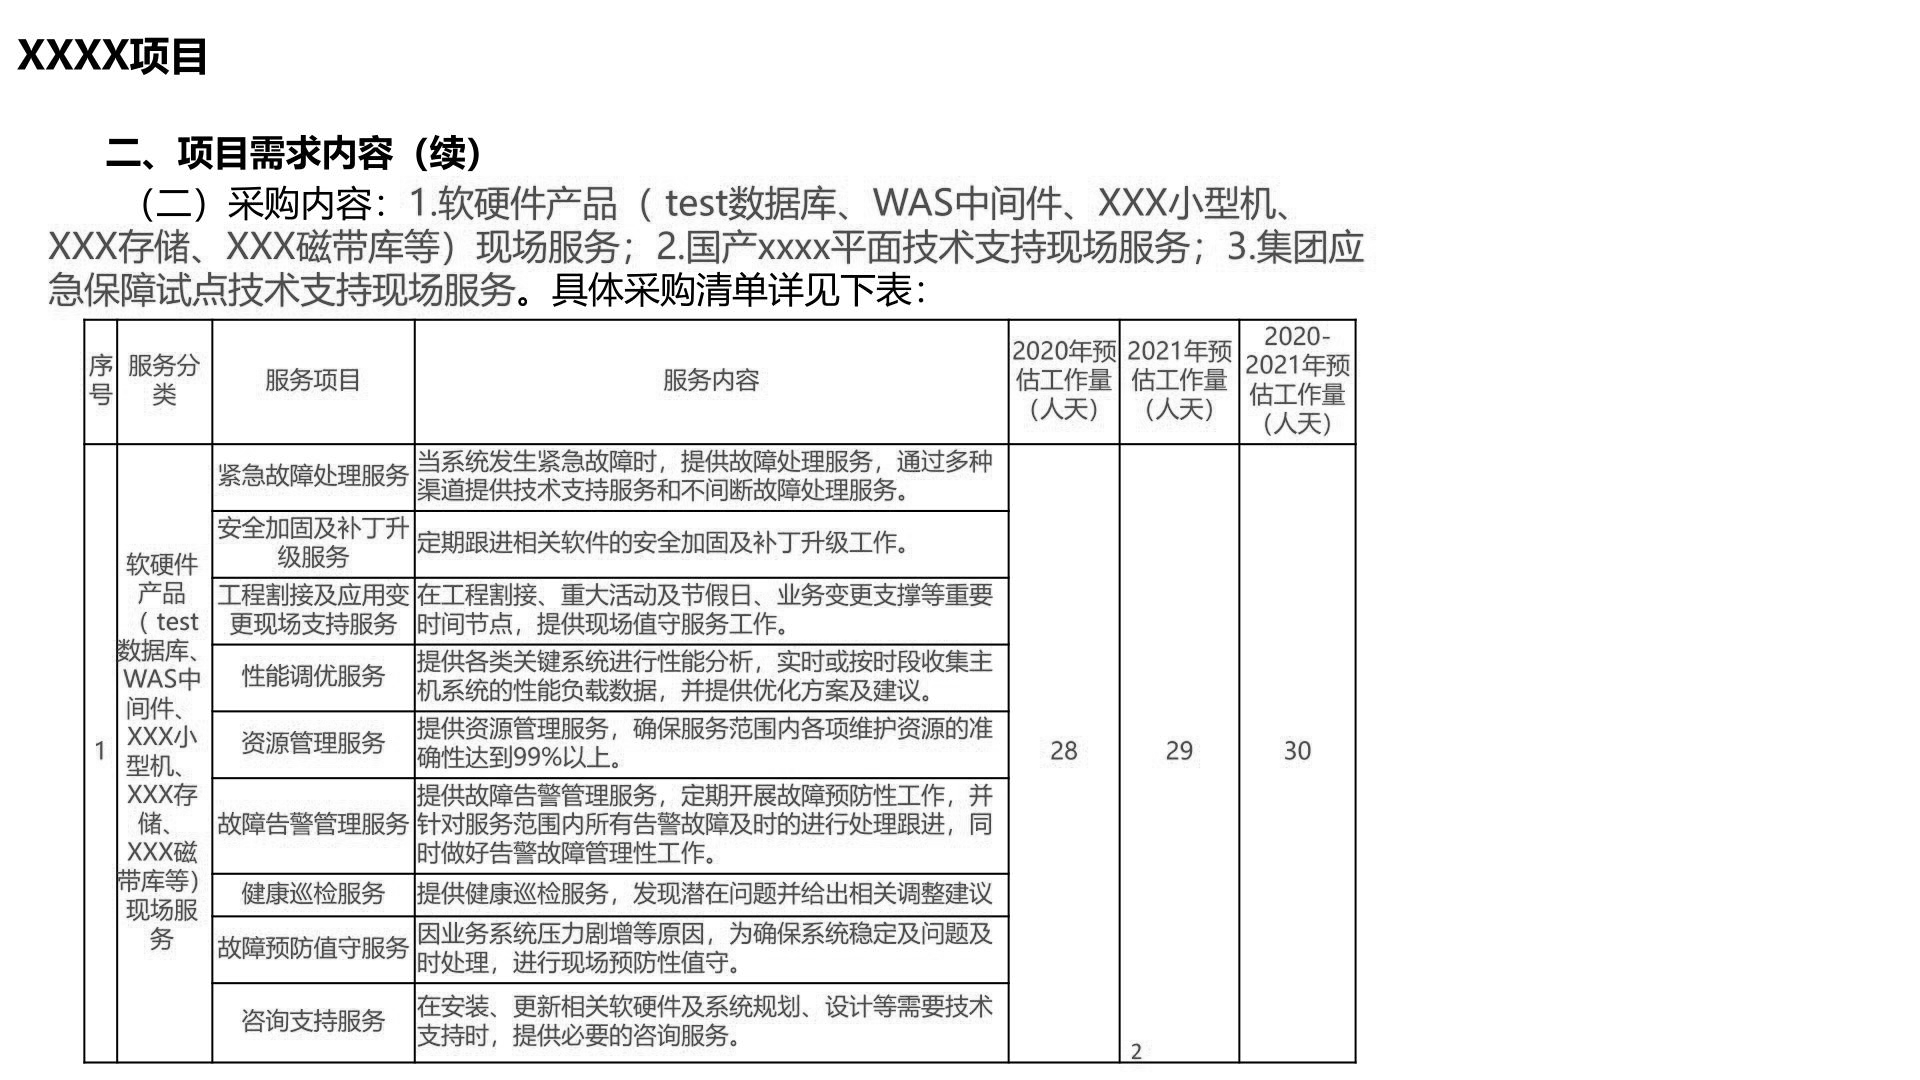

In [31]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(cv2_pil(gray))

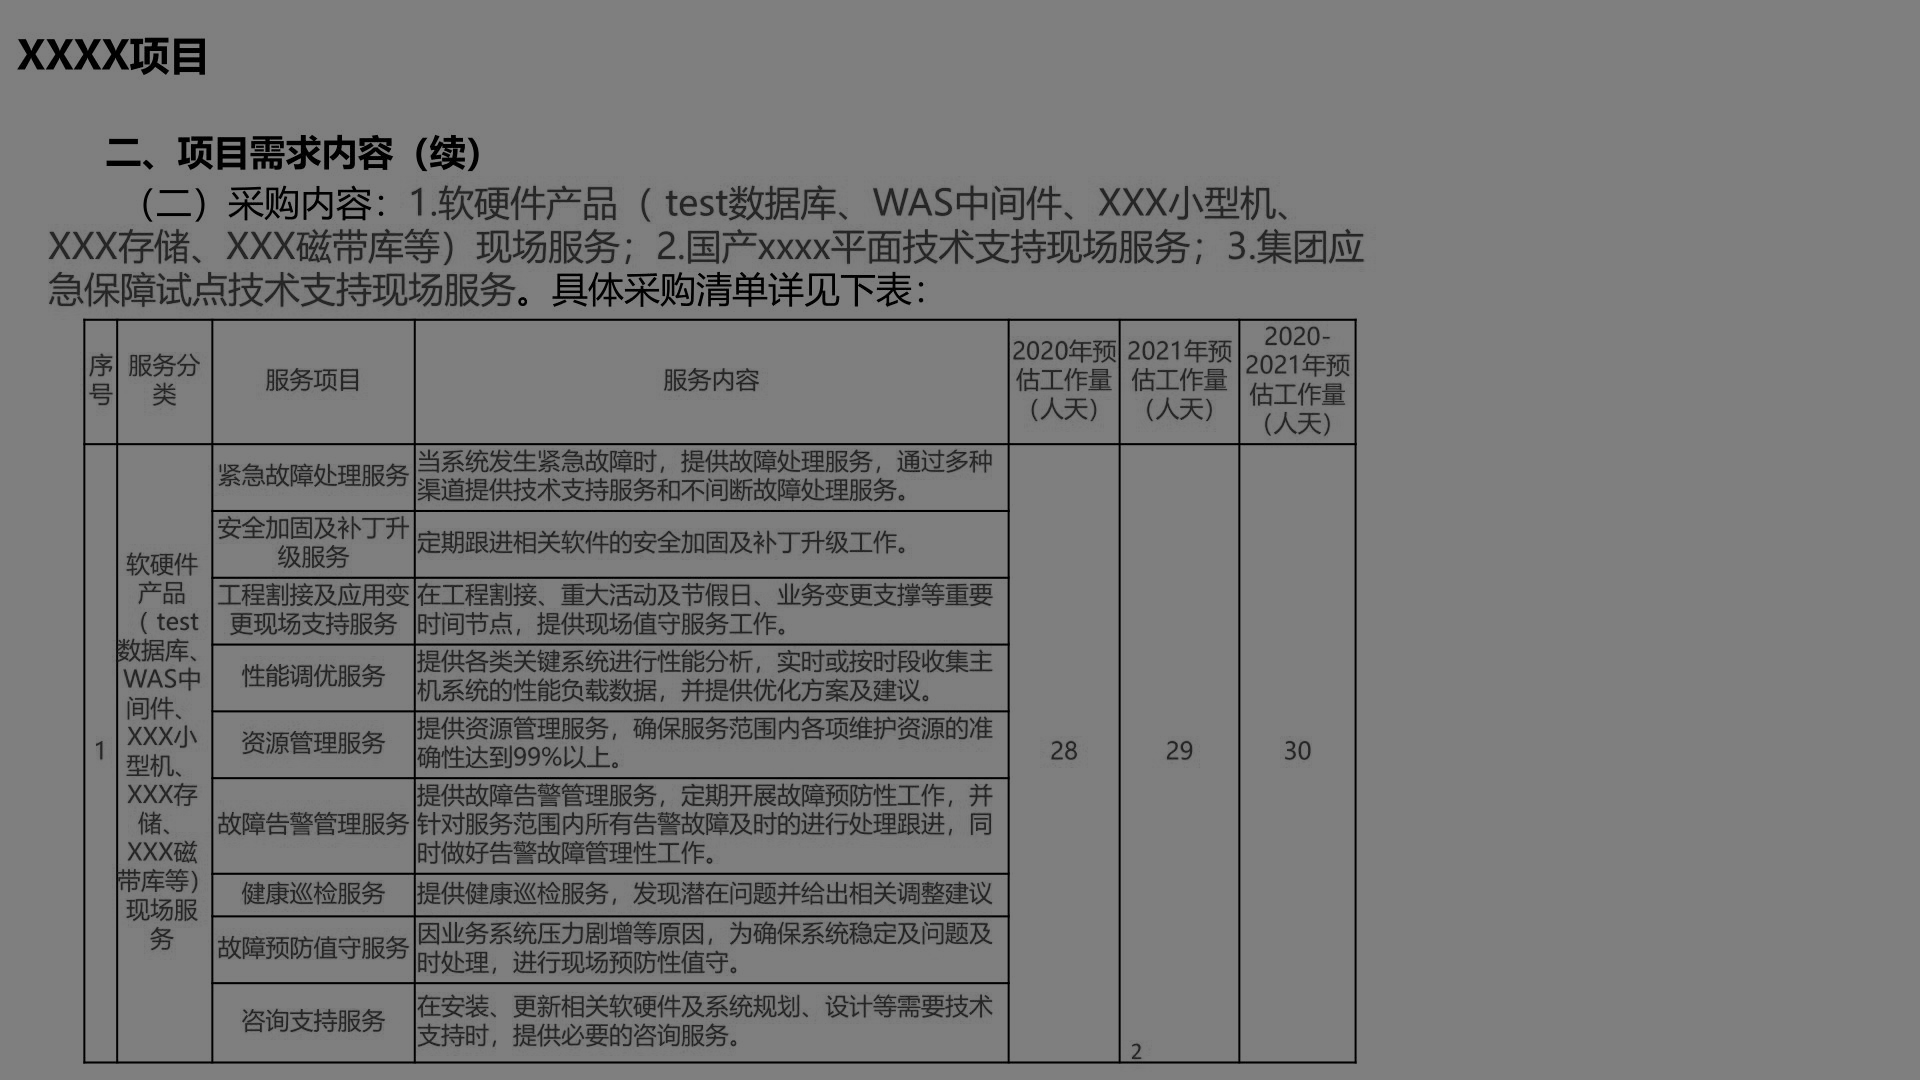

In [32]:
# 变暗
gray2 = gray // 2
display(cv2_pil(gray2))

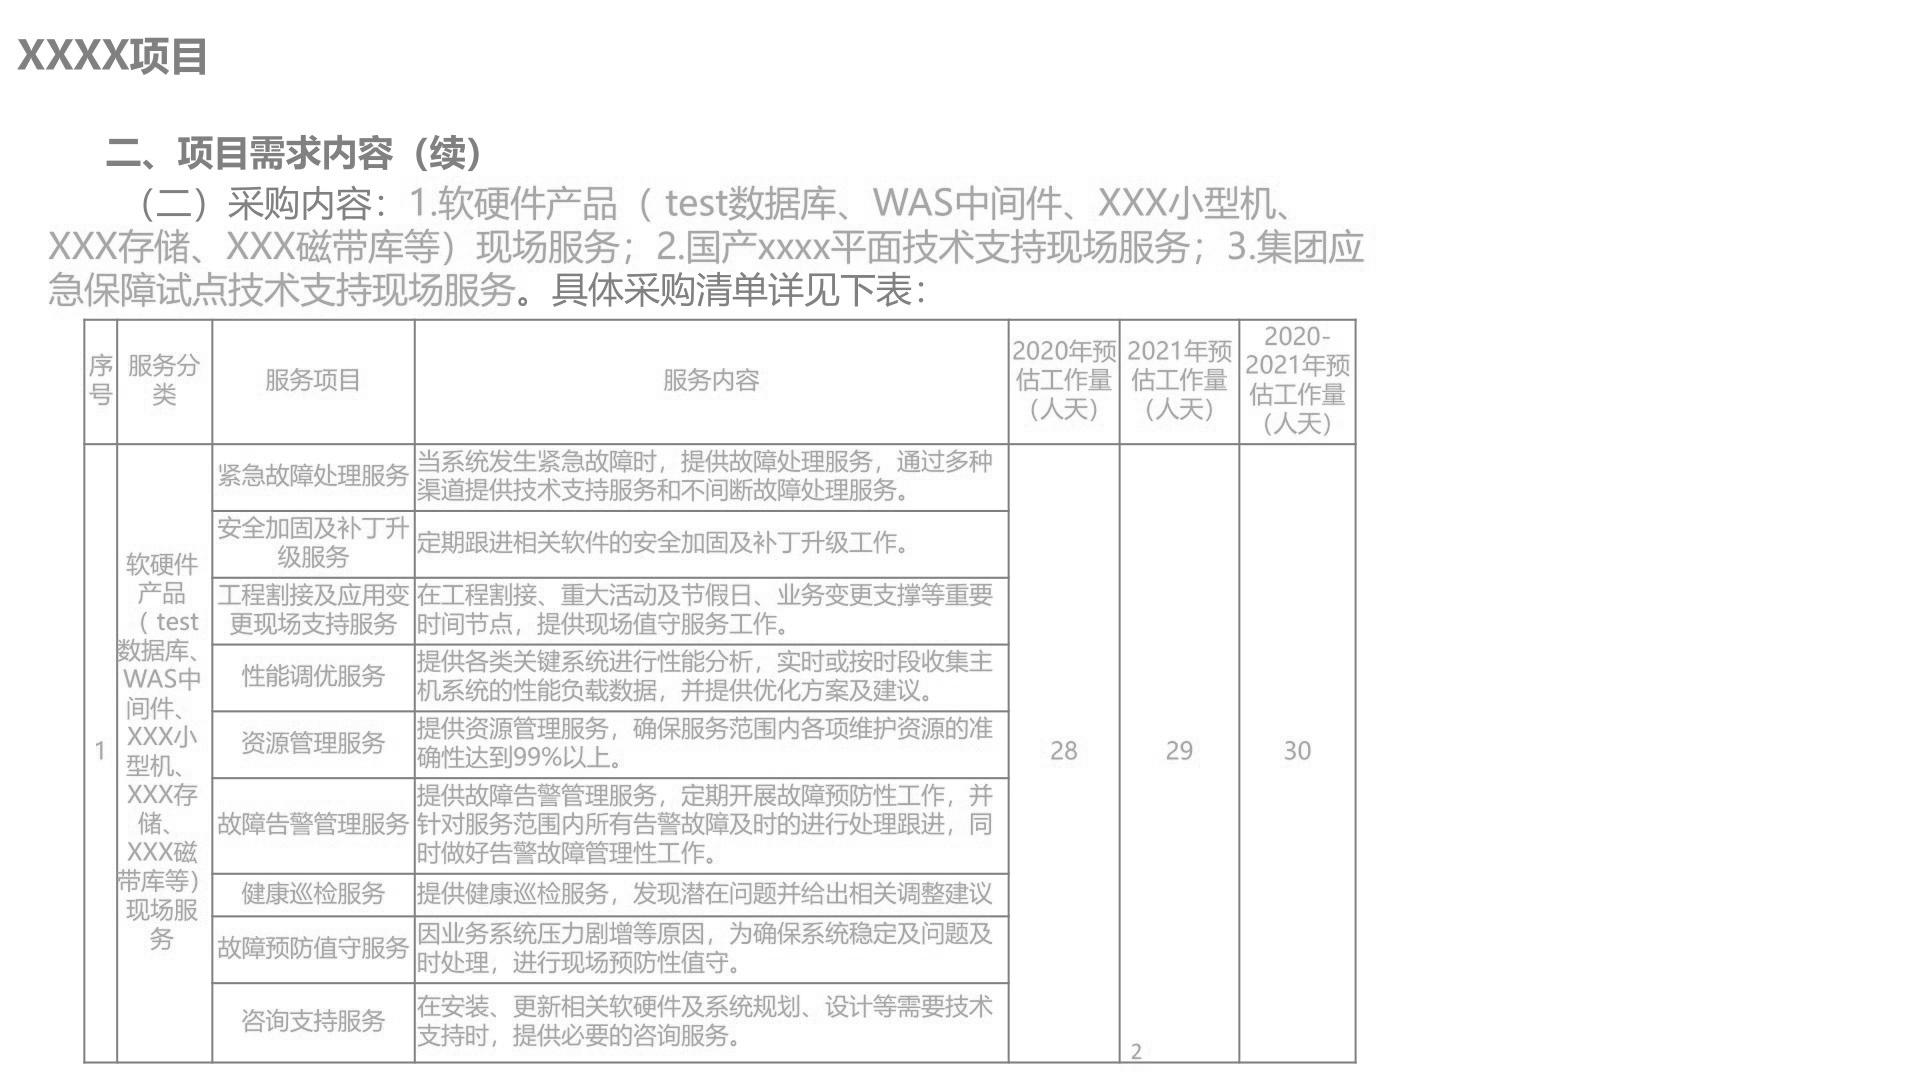

In [33]:
# 变亮
tmp = (255 - gray) // 2
gray2 = gray + tmp
display(cv2_pil(gray2))

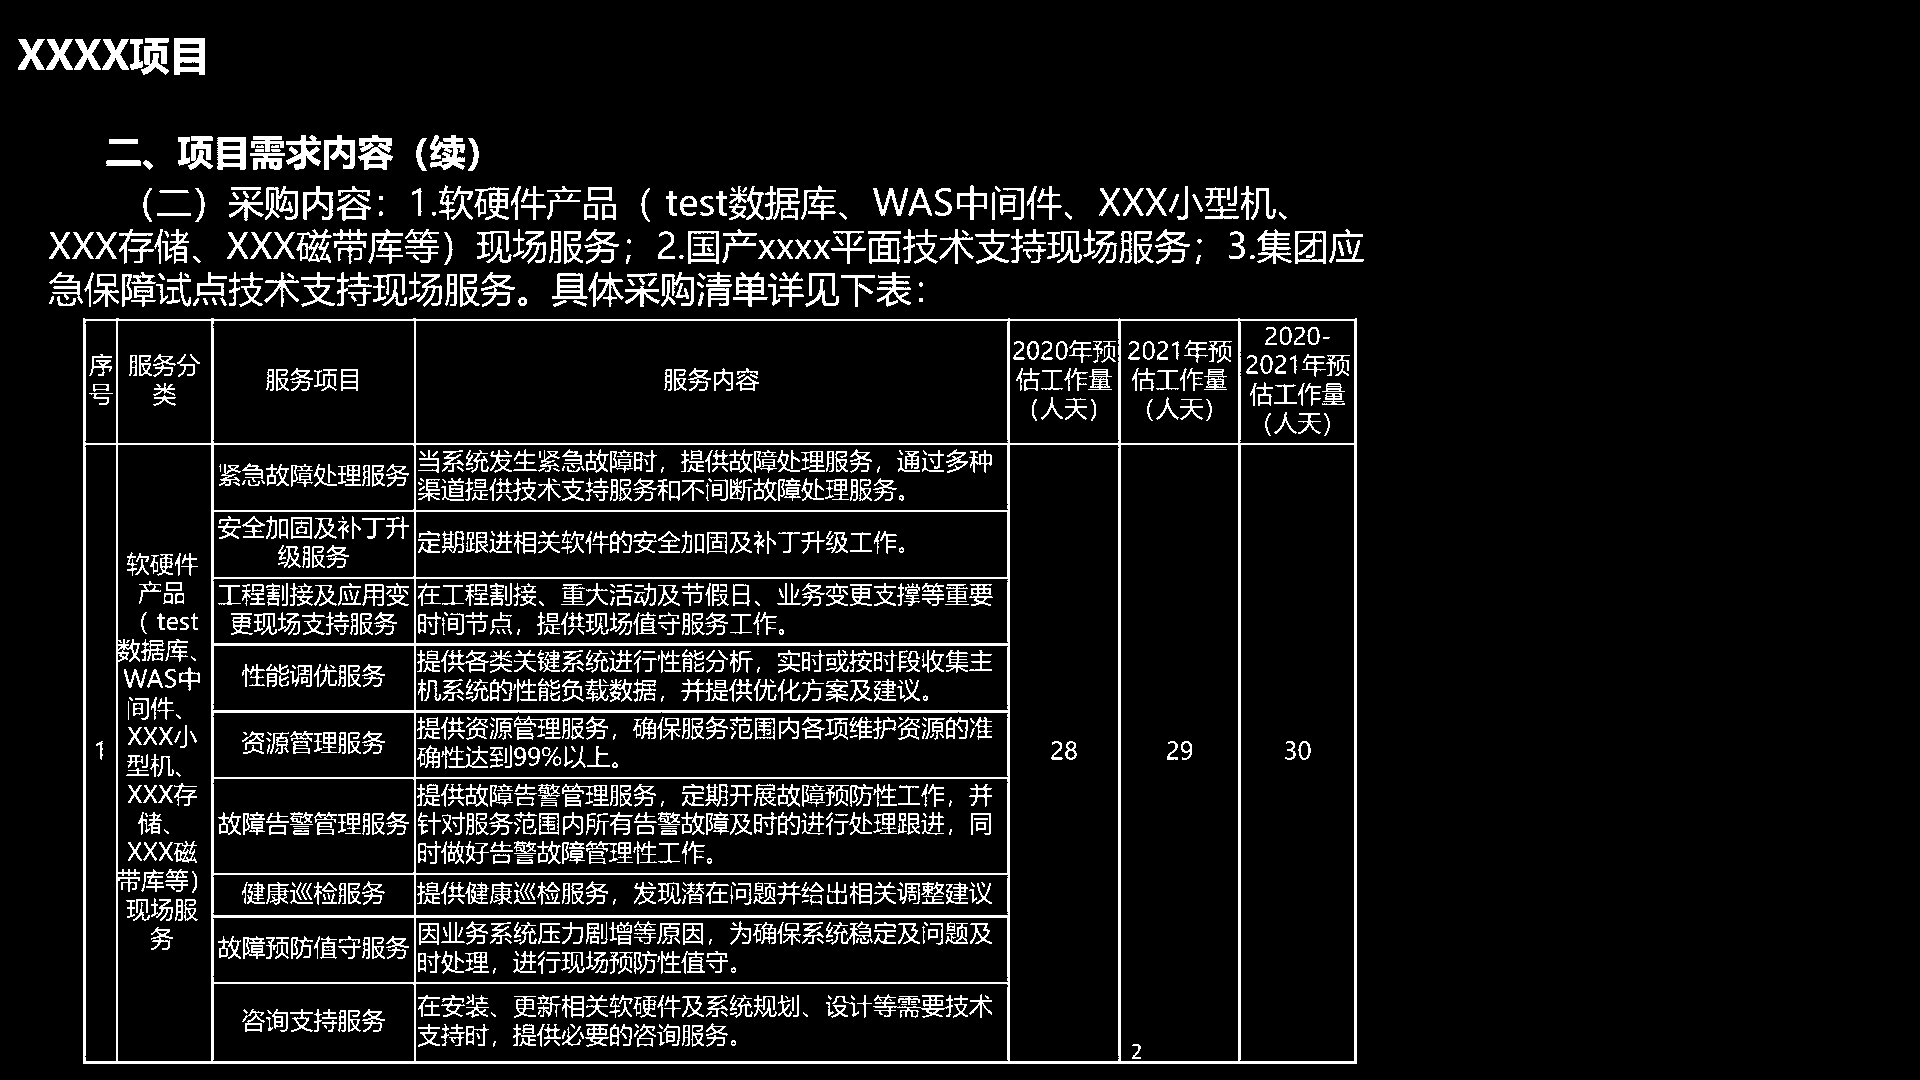

In [34]:
# 二值图像取反色
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary = cv2.bitwise_not(binary)
display(cv2_pil(binary))

当然上面这个取反色的例子只是作为演示，实际上而生成二值图像的参数`cv2.THRESH_BINARY`改为`cv2.THRESH_BINARY_INV`就能变成反色。

除了`bitwise_not`，还有另外几个：

- bitwise_and
- bitwise_or
- bitwise_xor

二值化图像，其实就是类似布尔值了，可以做布尔运算也不出奇。

## 7. 裁剪，缩放与旋转

裁剪在pillow中是有一个专门的方法的，不过在opencv中并不需要，使用numpy的语法就能解决：

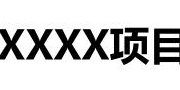

In [36]:
# 裁剪
img = cv2.imread(path)
img_crop = img[10:100, 20:200]
display(cv2_pil(img_crop))

In [37]:
# 缩放
cv2.resize?

Docstring:
resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
.   @brief Resizes an image.
.   
.   The function resize resizes the image src down to or up to the specified size. Note that the
.   initial dst type or size are not taken into account. Instead, the size and type are derived from
.   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
.   you may call the function as follows:
.   @code
.       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
.       resize(src, dst, dst.size(), 0, 0, interpolation);
.   @endcode
.   If you want to decimate the image by factor of 2 in each direction, you can call the function this
.   way:
.   @code
.       // specify fx and fy and let the function compute the destination image size.
.       resize(src, dst, Size(), 0.5, 0.5, interpolation);
.   @endcode
.   To shrink an image, it will generally look best with #INTER_AREA interpolation, whereas to
.   enlar

旋转有两类，一类是直接使用numpy的方法：

In [38]:
np.rot90?

Signature: np.rot90(m, k=1, axes=(0, 1))
Docstring:
Rotate an array by 90 degrees in the plane specified by axes.

Rotation direction is from the first towards the second axis.

Parameters
----------
m : array_like
    Array of two or more dimensions.
k : integer
    Number of times the array is rotated by 90 degrees.
axes: (2,) array_like
    The array is rotated in the plane defined by the axes.
    Axes must be different.

    .. versionadded:: 1.12.0

Returns
-------
y : ndarray
    A rotated view of `m`.

See Also
--------
flip : Reverse the order of elements in an array along the given axis.
fliplr : Flip an array horizontally.
flipud : Flip an array vertically.

Notes
-----
rot90(m, k=1, axes=(1,0)) is the reverse of rot90(m, k=1, axes=(0,1))
rot90(m, k=1, axes=(1,0)) is equivalent to rot90(m, k=-1, axes=(0,1))

Examples
--------
>>> m = np.array([[1,2],[3,4]], int)
>>> m
array([[1, 2],
       [3, 4]])
>>> np.rot90(m)
array([[2, 4],
       [1, 3]])
>>> np.rot90(m, 2)
array([[4, 

另一类是比较复杂的旋转，实现可以看这里[https://github.com/ibbd-dev/python-image-utils/blob/master/image_utils/convert.py](https://github.com/ibbd-dev/python-image-utils/blob/master/image_utils/convert.py )

实现如下：

In [40]:
def rotate(image, angle, center=None, scale=1.0, borderValue=(255, 255, 255)):
    """cv2旋转图像
    效果比Image.rotate效果要好
    :param image cv2图像对象
    :param angle 旋转角度（注意这里是角度，而不是弧度）
    :param center 中心点
    :param scale 缩放比例
    :param borderValue 填充颜色，默认为白色
    """
    # 获取图像尺寸
    (h, w) = image.shape[:2]

    # 若未指定旋转中心，则将图像中心设为旋转中心
    if center is None:
        center = (w / 2, h / 2)

    # 执行旋转
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h), borderValue=borderValue)

    # 返回旋转后的图像
    return rotated

以上函数可以通过`from image_utils.convert import rotate`来引用。可以指定旋转的中心点，旋转的角度，填充颜色等。

## 8. 蒙版

使用一个图像作为蒙版（mask），来控制另一个图像。

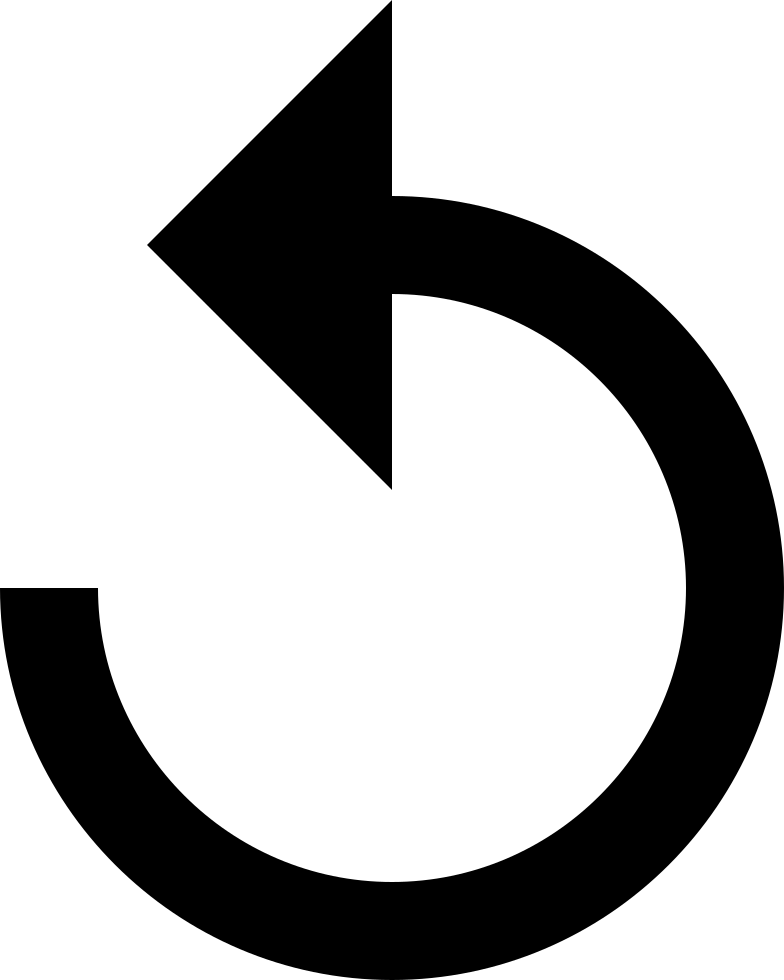

(980, 784, 3)

In [52]:
logo = cv2.imread('images/test.png')
display(cv2_pil(logo))
logo.shape

例如只展示上图中黑色的部分，白色部分则置为白色：

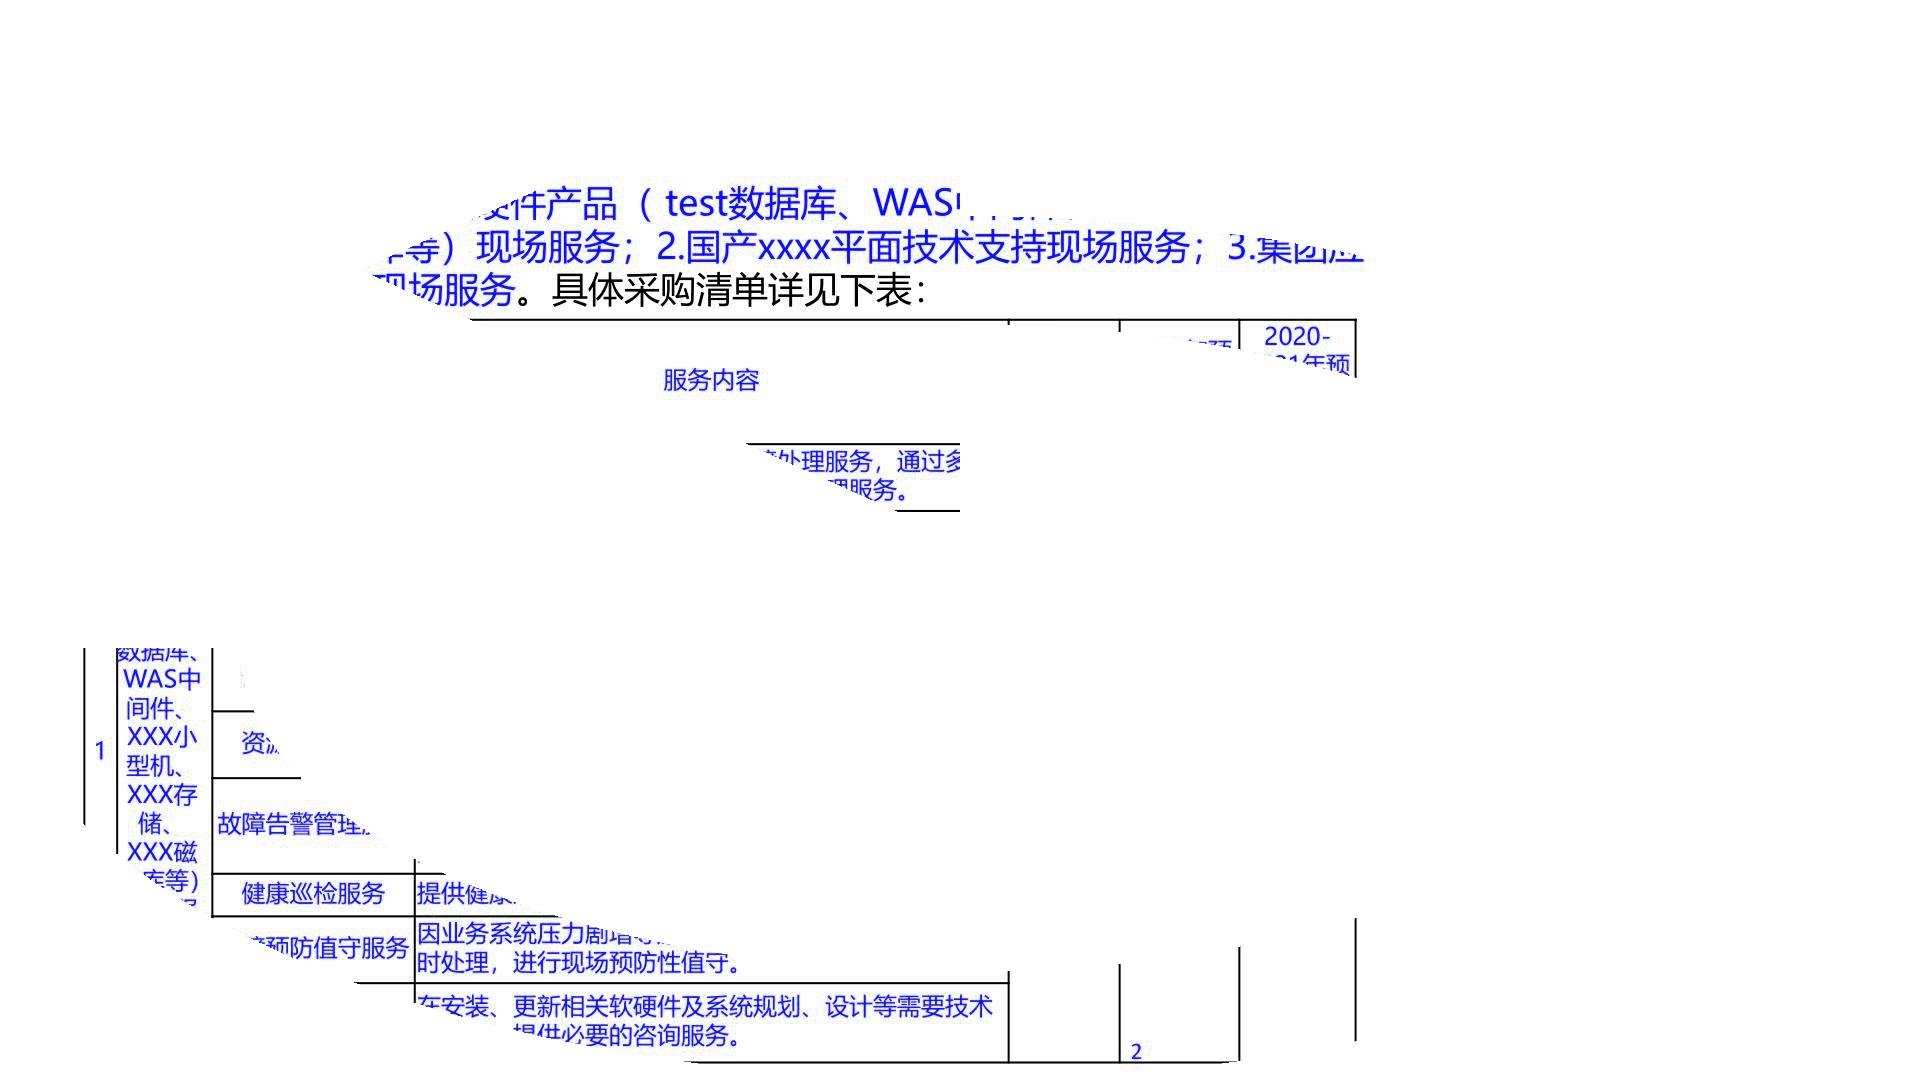

In [53]:
img = cv2.imread(path)

# 处理蒙版
logo = cv2.resize(logo, img.shape[:2][::-1])
mask = cv2.cvtColor(logo, cv2.COLOR_BGRA2GRAY)

# 将蒙版白色的地方置为白色
img[mask>127] = 255
display(cv2_pil(img))

## 9. 作业

将上图作为水印显示在某个图像上。